In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Ayaan/OneDrive/Desktop/Dataset/Dataset/HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
numeric_columns = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_23492\247961438.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [7]:
categorical_columns = ['CHAS']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_23492\4108828692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

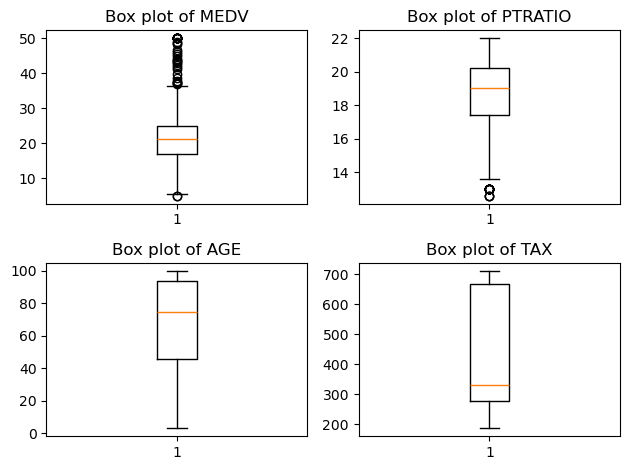

In [10]:
def showOutliers():
    for i, col in enumerate( ['MEDV','PTRATIO', 'AGE','TAX']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [11]:
# Remove outliers based on IQR
columns_to_check = ['MEDV','PTRATIO', 'AGE','TAX']
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nAfter Removing Outliers:")
df



After Removing Outliers:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


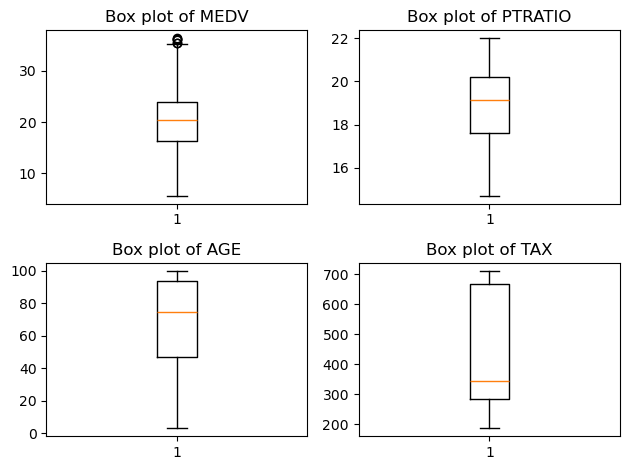

In [12]:
def showOutliers():
    for i, col in enumerate(['MEDV','PTRATIO', 'AGE','TAX']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [15]:
# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[columns_to_check] = scaler.fit_transform(df_scaled[columns_to_check])

print("\nAfter Scaling (Normalization):")
df_scaled



After Scaling (Normalization):


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,0.641607,4.0900,1,0.208015,0.082192,396.90,4.980000,0.597403
1,0.02731,0.0,7.07,0.0,0.469,6.421,0.782698,4.9671,2,0.104962,0.424658,396.90,9.140000,0.519481
2,0.02729,0.0,7.07,0.0,0.469,7.185,0.599382,4.9671,2,0.104962,0.424658,392.83,4.030000,0.944805
3,0.03237,0.0,2.18,0.0,0.458,6.998,0.441813,6.0622,3,0.066794,0.547945,394.63,2.940000,0.902597
4,0.06905,0.0,2.18,0.0,0.458,7.147,0.528321,6.0622,3,0.066794,0.547945,396.90,12.715432,0.993506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,0.681771,2.4786,1,0.164122,0.863014,391.99,12.715432,0.545455
502,0.04527,0.0,11.93,0.0,0.573,6.120,0.760041,2.2875,1,0.164122,0.863014,396.90,9.080000,0.487013
503,0.06076,0.0,11.93,0.0,0.573,6.976,0.907312,2.1675,1,0.164122,0.863014,396.90,5.640000,0.594156
504,0.10959,0.0,11.93,0.0,0.573,6.794,0.889804,2.3889,1,0.164122,0.863014,393.45,6.480000,0.532468


In [16]:
reg = LinearRegression()
X = df.drop(columns=['MEDV'])
Y = df['MEDV']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=123,shuffle=True)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(364, 13)
(92, 13)
(364,)
(92,)


In [18]:
reg.fit(X_train,Y_train)

LinearRegression()

In [19]:
Y_pred = reg.predict(X_test)
Y_pred

array([19.38378939, 25.94426222, 15.49188425, 16.42912388, 24.4566019 ,
       26.28983644, 19.42223841, 27.12595208, 16.63325089, 21.27996874,
       23.15139274, 26.22845668, 15.02893135, 23.09576074, 13.3436715 ,
       18.32127943, 24.83922494, 16.83941829,  9.79377527,  8.72371738,
       26.06708201, 17.04905983, 20.4014427 , 10.4420496 , 16.32759851,
       17.43669294, 20.34200673, 26.12866837, 20.3804763 ,  7.47679611,
       22.24794296, 25.27255194, 16.23120167, 20.61797725, 23.91607057,
       14.07109128, 26.13753245, 22.09710631, 29.60624029, 13.28615259,
       22.90839357, 19.41409937, 20.93085673, 19.26276673, 27.72650687,
       21.59836521, 24.3408124 , 17.10664876, 15.89132956, 17.09170636,
       19.27898057, 22.53186462, 24.60025604, 25.51803386, 27.6179185 ,
       25.83564447, 27.0068186 , 16.23546731, 22.27558055, 15.39098002,
       21.77549212, 18.97144245, 18.69242927, 17.89281549, 24.8738489 ,
       30.40107237, 18.66892146, 27.94223151, 15.18434654, 17.80

In [20]:
Y_test

49     19.4
85     26.6
34     13.5
431    14.1
271    25.2
       ... 
460    16.4
463    20.2
340    18.7
471    19.6
127    16.2
Name: MEDV, Length: 92, dtype: float64

In [21]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 9.926719113389407
R-squared Score: 0.7520227220827936
